In [18]:
## Import library

import pandas as pd 
# import keras
import numpy as np
import matplotlib.pyplot as plt
from cleanlab.classification import CleanLearning
# import tensorflow as tf
# from tensorflow import keras
# from keras import backend as K
from cleanlab import *
from torch import nn
import torch as torch
from skorch import NeuralNetClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from cleanlab.filter import find_label_issues
from cleanlab.dataset import health_summary


In [2]:
## Load the datas 

fmnist_test = pd.read_csv('fashion-mnist_test.csv')
fmnist_train = pd.read_csv('fashion-mnist_train.csv')

In [3]:
## Sort datas in x and y 

label_fmnist_test = fmnist_test.iloc[:,0]
label_fmnist_train = fmnist_train.iloc[:,0]
fmnist_test = fmnist_test.iloc[:,1:]
fmnist_train = fmnist_train.iloc[:,1:]

In [4]:
##Our label is jsute a number,

label_fmnist_test.shape
Y_test = label_fmnist_test.to_numpy()
Y_test = Y_test.astype('int32')
# Y_test = torch.from_numpy(Y_test)
# print(Y_test)

In [5]:
## Normalize

normalized_fmnist_test = fmnist_test /255
normalized_fmnist_train = fmnist_train /255

In [6]:
## We then constructs our pictures 
fashion_test = np.array(normalized_fmnist_test)
fashion_test = fashion_test.reshape(len(fashion_test),1,28,28)
fashion_test = fashion_test.astype('float32')

fashion_train = np.array(normalized_fmnist_train)
fashion_train = fashion_train.reshape(len(fashion_train),1,28,28)
fashion_train = fashion_train.astype('float32')

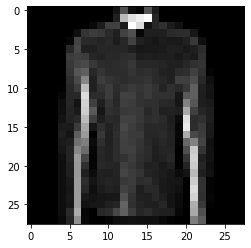

In [7]:
## Show if its good 
exemple_image = fashion_test[77,0,:,:]
plt.imshow(exemple_image, cmap='gray')

In [8]:

class ClassifierModule(nn.Module):
    def __init__(self):
        super().__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(1, 6, 3),
            nn.ReLU(),
            nn.BatchNorm2d(6),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, 3),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.out = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.Softmax(dim=-1),
        )

    def forward(self, X):
        X = self.cnn(X)
        X = self.out(X)
        return X

In [9]:
model_skorch = NeuralNetClassifier(ClassifierModule, max_epochs=20)

In [10]:
y = Y_test
X = fashion_test
num_crossval_folds = 5
pred_probs = cross_val_predict(model_skorch, X, y,
                               cv=num_crossval_folds,
                               method='predict_proba')

/home/craven/miniconda3/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.9273       0.6262        1.8492  3.6469
      2        1.1768       0.7481        0.9410  0.5628
      3        0.8411       0.7681        0.7419  0.5609
      4        0.7040       0.7800        0.6530  0.5774
      5        0.6325       0.7894        0.6045  0.5435
      6        0.5864       0.7956        0.5713  0.5226
      7        0.5521       0.7994        0.5457  0.5233
      8        0.5245       0.8063        0.5270  0.5150
      9        0.5013       0.8137        0.5112  0.5113
     10        0.4813       0.8194        0.4976  0.5061
     11        0.4635       0.8237        0.4859  0.5220
     12        0.4476       0.8244        0.4757  0.5210
     13        0.4331       0.8275        0.4681  0.5121
     14        0.4195       0.8287        0.4595  0.5156
     15        0.4073       0.8325        0.4524  0.5128
     16        0.3961       0.8

/home/craven/miniconda3/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.7337       0.6369        1.5525  0.5241
      2        1.0523       0.7306        0.8861  0.5216
      3        0.8156       0.7525        0.7395  0.5282
      4        0.7097       0.7712        0.6656  0.5379
      5        0.6475       0.7856        0.6197  0.5321
      6        0.6040       0.7963        0.5877  0.5250
      7        0.5702       0.7963        0.5626  0.5447
      8        0.5423       0.8037        0.5422  0.5833
      9        0.5185       0.8100        0.5248  0.5819
     10        0.4978       0.8163        0.5099  0.5010
     11        0.4792       0.8200        0.4966  0.4066
     12        0.4621       0.8263        0.4847  0.3998
     13        0.4464       0.8300        0.4738  0.4001
     14        0.4322       0.8350        0.4638  0.4013
     15        0.4193       0.8375        0.4544  0.4562
     16        0.4075       0.8

/home/craven/miniconda3/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.7778       0.6600        1.7329  0.4012
      2        1.0374       0.7400        0.8734  0.5191
      3        0.7947       0.7600        0.7280  0.4032
      4        0.6976       0.7688        0.6615  0.3932
      5        0.6408       0.7788        0.6215  0.4738
      6        0.6006       0.7863        0.5925  0.5191
      7        0.5695       0.7919        0.5713  0.5691
      8        0.5435       0.7950        0.5510  0.5557
      9        0.5207       0.8100        0.5327  0.5341
     10        0.5001       0.8113        0.5175  0.5554
     11        0.4818       0.8175        0.5025  0.5798
     12        0.4650       0.8244        0.4915  0.4838
     13        0.4498       0.8269        0.4804  0.4849
     14        0.4356       0.8300        0.4702  0.4129
     15        0.4225       0.8313        0.4608  0.4167
     16        0.4103       0.8

/home/craven/miniconda3/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.7941       0.6344        1.6145  0.5239
      2        1.1503       0.7369        0.9531  0.5335
      3        0.8584       0.7675        0.7729  0.5214
      4        0.7273       0.7769        0.6813  0.5282
      5        0.6533       0.7869        0.6277  0.5248
      6        0.6036       0.7956        0.5886  0.5241
      7        0.5663       0.8037        0.5608  0.5182
      8        0.5361       0.8094        0.5368  0.4075
      9        0.5108       0.8100        0.5182  0.3894
     10        0.4888       0.8150        0.5028  0.4000
     11        0.4696       0.8213        0.4891  0.3884
     12        0.4523       0.8244        0.4778  0.5151
     13        0.4369       0.8263        0.4670  0.5267
     14        0.4231       0.8294        0.4586  0.5322
     15        0.4110       0.8256        0.4530  0.4456
     16        0.3997       0.8

/home/craven/miniconda3/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.7601       0.5819        1.4880  0.5198
      2        1.1394       0.6919        0.9853  0.5184
      3        0.8843       0.7362        0.8178  0.5161
      4        0.7584       0.7556        0.7297  0.4544
      5        0.6848       0.7625        0.6739  0.3838
      6        0.6365       0.7738        0.6373  0.4075
      7        0.6015       0.7781        0.6104  0.4054
      8        0.5737       0.7887        0.5906  0.4435
      9        0.5506       0.7950        0.5733  0.4023
     10        0.5306       0.7994        0.5583  0.4040
     11        0.5129       0.8050        0.5463  0.4225
     12        0.4967       0.8094        0.5359  0.4732
     13        0.4820       0.8137        0.5270  0.4695
     14        0.4685       0.8137        0.5191  0.4247
     15        0.4560       0.8163        0.5114  0.4231
     16        0.4445       0.8

In [11]:

predicted_labels = pred_probs.argmax(axis=1)
acc = accuracy_score(y, predicted_labels)

print(f"Cross-validated estimate of accuracy on held-out data: {acc}")

Cross-validated estimate of accuracy on held-out data: 0.8411


In [53]:
method = 'both'
ranked_label_issues = find_label_issues(y, pred_probs,filter_by=method,return_indices_ranked_by="self_confidence")

print(f"Cleanlab found {len(ranked_label_issues)} label issues.")
print("Here are the indices of the top 15 most likely label errors:\n"
      f"{ranked_label_issues[:15]}")


Cleanlab found 752 label issues.
Here are the indices of the top 15 most likely label errors:
[5232 8042 8950 1178 2128 5076 1585 3591 2313 2224 4989 6512 1961 3558
 9330]


In [24]:
fashion_dico = {
    '0':'T-shirt/top',
    '1':'Trouser',
    '2':'Pullover',
    '3':'Dress',
    '4':'Coat',
    '5':'Sandal',
    '6':'Shirt',
    '7':'Sneaker',
    '8':'Bag',
    '9':'Ankle boot'
}
def plot_examples(id_iter, nrows=1, ncols=1):
    for count, id in enumerate(id_iter):
        plt.subplot(nrows, ncols, count + 1)
        plt.imshow(X[id].reshape(28, 28), cmap="gray")
        fashion_id = str(y[id])
        plt.title(f"id: {id} \n label: {fashion_dico[fashion_id]}")
        plt.axis("off")

    plt.tight_layout(h_pad=2.0)

In [25]:
plot_examples(ranked_label_issues[range(15)], 3, 5)

NameError: name 'ranked_label_issues' is not defined

In [26]:
health_summary(y, pred_probs)

------------------------------------------------------------
|  Generating a Cleanlab Dataset Health Summary            |
|   for your dataset with 10,000 examples and 10 classes.  |
|  Note, Cleanlab is not a medical doctor... yet.          |
------------------------------------------------------------

Overall Class Quality and Noise across your dataset (below)
------------------------------------------------------------ 



,Class Index,Label Issues,Inverse Label Issues,Label Noise,Inverse Label Noise,Label Quality Score
0,6,290,361,0.290,0.337068,0.710
1,2,170,110,0.170,0.117021,0.830
2,4,155,181,0.155,0.176413,0.845
3,0,130,157,0.130,0.152872,0.870
4,3,72,23,0.072,0.024185,0.928
5,5,20,7,0.020,0.007092,0.980
6,9,18,14,0.018,0.014056,0.982
7,7,16,30,0.016,0.029586,0.984
8,1,14,2,0.014,0.002024,0.986
9,8,13,13,0.013,0.013000,0.987



Class Overlap. In some cases, you may want to merge classes in the top rows (below)
-----------------------------------------------------------------------------------



,Class Index A,Class Index B,Num Overlapping Examples,Joint Probability
0,0,6,242,0.0242
1,4,6,206,0.0206
2,2,6,157,0.0157
3,2,4,98,0.0098
4,7,9,27,0.0027
5,0,3,26,0.0026
6,3,6,26,0.0026
7,3,4,26,0.0026
8,5,7,19,0.0019
9,0,2,13,0.0013



 * Overall, about 9% (898 of the 10,000) labels in your dataset have potential issues.
 ** The overall label health score for this dataset is: 0.91.

Generated with <3 from Cleanlab.



{'overall_label_health_score': 0.9102,
 'joint': array([[0.087 , 0.    , 0.0012, 0.0007, 0.    , 0.    , 0.0108, 0.    ,
         0.0003, 0.    ],
        [0.    , 0.0986, 0.0001, 0.0006, 0.    , 0.    , 0.0007, 0.    ,
         0.    , 0.    ],
        [0.0001, 0.    , 0.083 , 0.    , 0.0076, 0.    , 0.0093, 0.    ,
         0.    , 0.    ],
        [0.0019, 0.0001, 0.001 , 0.0928, 0.0019, 0.    , 0.0023, 0.    ,
         0.    , 0.    ],
        [0.0002, 0.    , 0.0022, 0.0007, 0.0845, 0.    , 0.0122, 0.    ,
         0.0002, 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    , 0.098 , 0.    , 0.0012,
         0.0003, 0.0005],
        [0.0134, 0.    , 0.0064, 0.0003, 0.0084, 0.    , 0.071 , 0.    ,
         0.0005, 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    , 0.0007, 0.    , 0.0984,
         0.    , 0.0009],
        [0.0001, 0.0001, 0.0001, 0.    , 0.0002, 0.    , 0.0008, 0.    ,
         0.0987, 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.  

In [33]:
from cleanlab.rank import get_label_quality_scores
quality_scores = get_label_quality_scores(y,pred_probs)
for id in range(10):
        print(f"Label: {fashion_dico[str(id)]} has a score of : {quality_scores[id]} \n")

Label: T-shirt/top has a score of : 0.8650575876235962 

Label: Trouser has a score of : 0.9996353387832642 

Label: Pullover has a score of : 0.593125581741333 

Label: Dress has a score of : 0.14000502228736877 

Label: Coat has a score of : 0.9979678988456726 

Label: Sandal has a score of : 0.33959320187568665 

Label: Shirt has a score of : 0.9856202602386475 

Label: Sneaker has a score of : 0.36190271377563477 

Label: Bag has a score of : 0.994206428527832 

Label: Ankle boot has a score of : 0.9126272797584534 



In [ ]:
## How to improve the model ?? 

# 3 solutions : 

    # Remove all data that cleanlab deems problematic.
    # Remove data with quality scores below a threshold. We define or remove a set number of data points.
    # Manually mark the data for removal starting from the lowest quality score.